<a href="https://colab.research.google.com/github/Sreenishetty/Car_price_prediction/blob/main/cars_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all libraries :

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

In [ ]:
cars_data = pd.read_csv('cars_price.csv')
cars_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# Shape of the data :
cars_data.shape

(205, 26)

In [ ]:
# Dataframe information :
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Describing the data :
cars_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
import numpy as np
cars_data.replace('?',np.nan,inplace=True)



In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# cars_data.loc[cars_data.price == '?']

In [ ]:
# import numpy as np
# cars_data.replace('?',np.nan,inplace=True)

In [ ]:
cars_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
cars_data.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [ ]:
cars_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
cars_data["bore"] = pd.to_numeric(cars_data["bore"])
cars_data["normalized-losses"] = pd.to_numeric(cars_data["normalized-losses"])
cars_data["stroke"] = pd.to_numeric(cars_data["stroke"])
cars_data["horsepower"] = pd.to_numeric(cars_data["horsepower"])
cars_data["peak-rpm"] = pd.to_numeric(cars_data["peak-rpm"])
cars_data["price"] = pd.to_numeric(cars_data["price"])

In [ ]:
type(cars_data['price'].value_counts())

pandas.core.series.Series

In [ ]:
# Describing the data :
cars_data.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# **Data Cleaning :**

In [ ]:
cars_data.isnull().sum().sum()


59

In [ ]:
cars_data["price"] = cars_data["price"].fillna(cars_data["price"].mean())
cars_data["normalized-losses"] = cars_data["normalized-losses"].fillna(cars_data["normalized-losses"].mean())
cars_data["peak-rpm"] = cars_data["peak-rpm"].fillna(cars_data["peak-rpm"].mean())
cars_data["horsepower"] = cars_data["horsepower"].fillna(cars_data["horsepower"].mean())
cars_data["stroke"] = cars_data["stroke"].fillna(cars_data["stroke"].mean())
cars_data["bore"] = cars_data["bore"].fillna(cars_data["bore"].mean())


In [ ]:
# cars_data["normalized-losses"] = cars_data["normalized-losses"].replace(np.nan, 0)
cars_data["num-of-doors"] = cars_data["num-of-doors"].replace(np.nan, 0)

In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
numerical_feat = cars_data.columns[cars_data.dtypes != 'O']
numerical_feat

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
categorical_feat = cars_data.columns[cars_data.dtypes == 'O']
categorical_feat

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [ ]:
cars_data.isnull().sum().sum()

0

In [ ]:
cars_data.isnull().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# We don't need the car_ID Feature so we can drop that
cars_data.drop(['normalized-losses'], axis=1, inplace=True)

In [ ]:
cars_data.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Filter the Discrete & Contineous features from the numerical Features
discrete_feat = cars_data.columns[cars_data.dtypes == 'int64']
discrete_feat

Index(['symboling', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg'], dtype='object')

In [ ]:
contineous_feat = cars_data.columns[cars_data.dtypes == 'float64']
contineous_feat

Index(['wheel-base', 'length', 'width', 'height', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price'],
      dtype='object')

In [ ]:
# Find the Each Unique Category in Categorical Feature

for x in categorical_feat:
  print("Category Name:",x, "===========>",len(cars_data[x].unique()))

Category Name: make ===========> 22
Category Name: fuel-type ===========> 2
Category Name: aspiration ===========> 2
Category Name: num-of-doors ===========> 3
Category Name: body-style ===========> 5
Category Name: drive-wheels ===========> 3
Category Name: engine-location ===========> 2
Category Name: engine-type ===========> 7
Category Name: num-of-cylinders ===========> 7
Category Name: fuel-system ===========> 8


In [ ]:
# Analyze the Skew and Kurtosis
for ctf in contineous_feat:
  print("Feture Name:", ctf, "=====>", "Skewness:", cars_data[ctf].skew(), "========>" ,"Kurtosis:", cars_data[ctf].kurt())


Feture Name: wheel-base =====> Skewness: 1.0502137758714858 ========> Kurtosis: 1.0170389463774234
Feture Name: length =====> Skewness: 0.1559537713215604 ========> Kurtosis: -0.08289485344758996
Feture Name: width =====> Skewness: 0.904003498786254 ========> Kurtosis: 0.7027642441369477
Feture Name: height =====> Skewness: 0.06312273247192804 ========> Kurtosis: -0.4438123650575503
Feture Name: bore =====> Skewness: 0.02021071115159105 ========> Kurtosis: -0.7850402844106923
Feture Name: stroke =====> Skewness: -0.6897843288328929 ========> Kurtosis: 2.174470832494809
Feture Name: compression-ratio =====> Skewness: 2.6108624576151533 ========> Kurtosis: 5.233054347604856
Feture Name: horsepower =====> Skewness: 1.3977631283295846 ========> Kurtosis: 2.678182248336632
Feture Name: peak-rpm =====> Skewness: 0.07359121245641652 ========> Kurtosis: 0.0867703457300757
Feture Name: price =====> Skewness: 1.8273241596359218 ========> Kurtosis: 3.3542158966219255


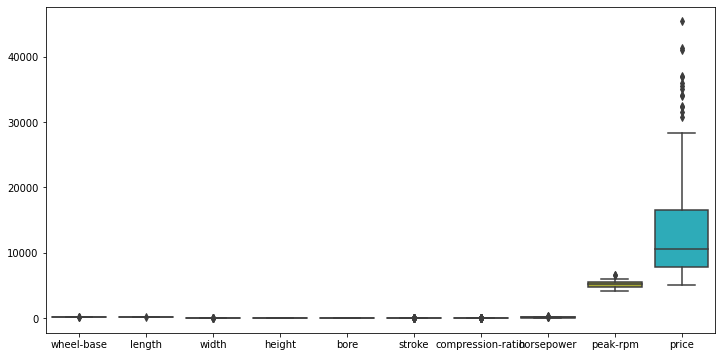

In [ ]:
# Outliers on Categorical Feature Analysis

plt.figure(figsize=(12,6))
sns.boxplot(data=cars_data[contineous_feat])
plt.show()

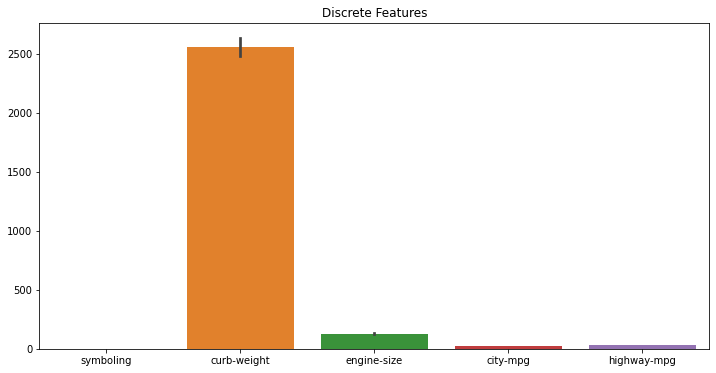

In [ ]:
# Analyze the discrete features

plt.figure(figsize=(12,6))
sns.barplot(data=cars_data[discrete_feat])
plt.title('Discrete Features')
plt.show()

In [ ]:
cars_data[discrete_feat].describe()

,symboling,curb-weight,engine-size,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,2555.565854,126.907317,25.219512,30.751220
std,1.245307,520.680204,41.642693,6.542142,6.886443
min,-2.000000,1488.000000,61.000000,13.000000,16.000000
25%,0.000000,2145.000000,97.000000,19.000000,25.000000
50%,1.000000,2414.000000,120.000000,24.000000,30.000000
75%,2.000000,2935.000000,141.000000,30.000000,34.000000
max,3.000000,4066.000000,326.000000,49.000000,54.000000


In [ ]:
cars_data[contineous_feat].describe()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,3.329751,3.255423,10.142537,104.256158,5125.369458,13207.129353
std,6.021776,12.337289,2.145204,2.443522,0.270844,0.313597,3.972040,39.519211,476.979093,7868.768212
min,86.600000,141.100000,60.300000,47.800000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,3.310000,3.290000,9.000000,95.000000,5200.000000,10595.000000
75%,102.400000,183.100000,66.900000,55.500000,3.580000,3.410000,9.400000,116.000000,5500.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,3.940000,4.170000,23.000000,288.000000,6600.000000,45400.000000


<Figure size 1440x432 with 0 Axes>

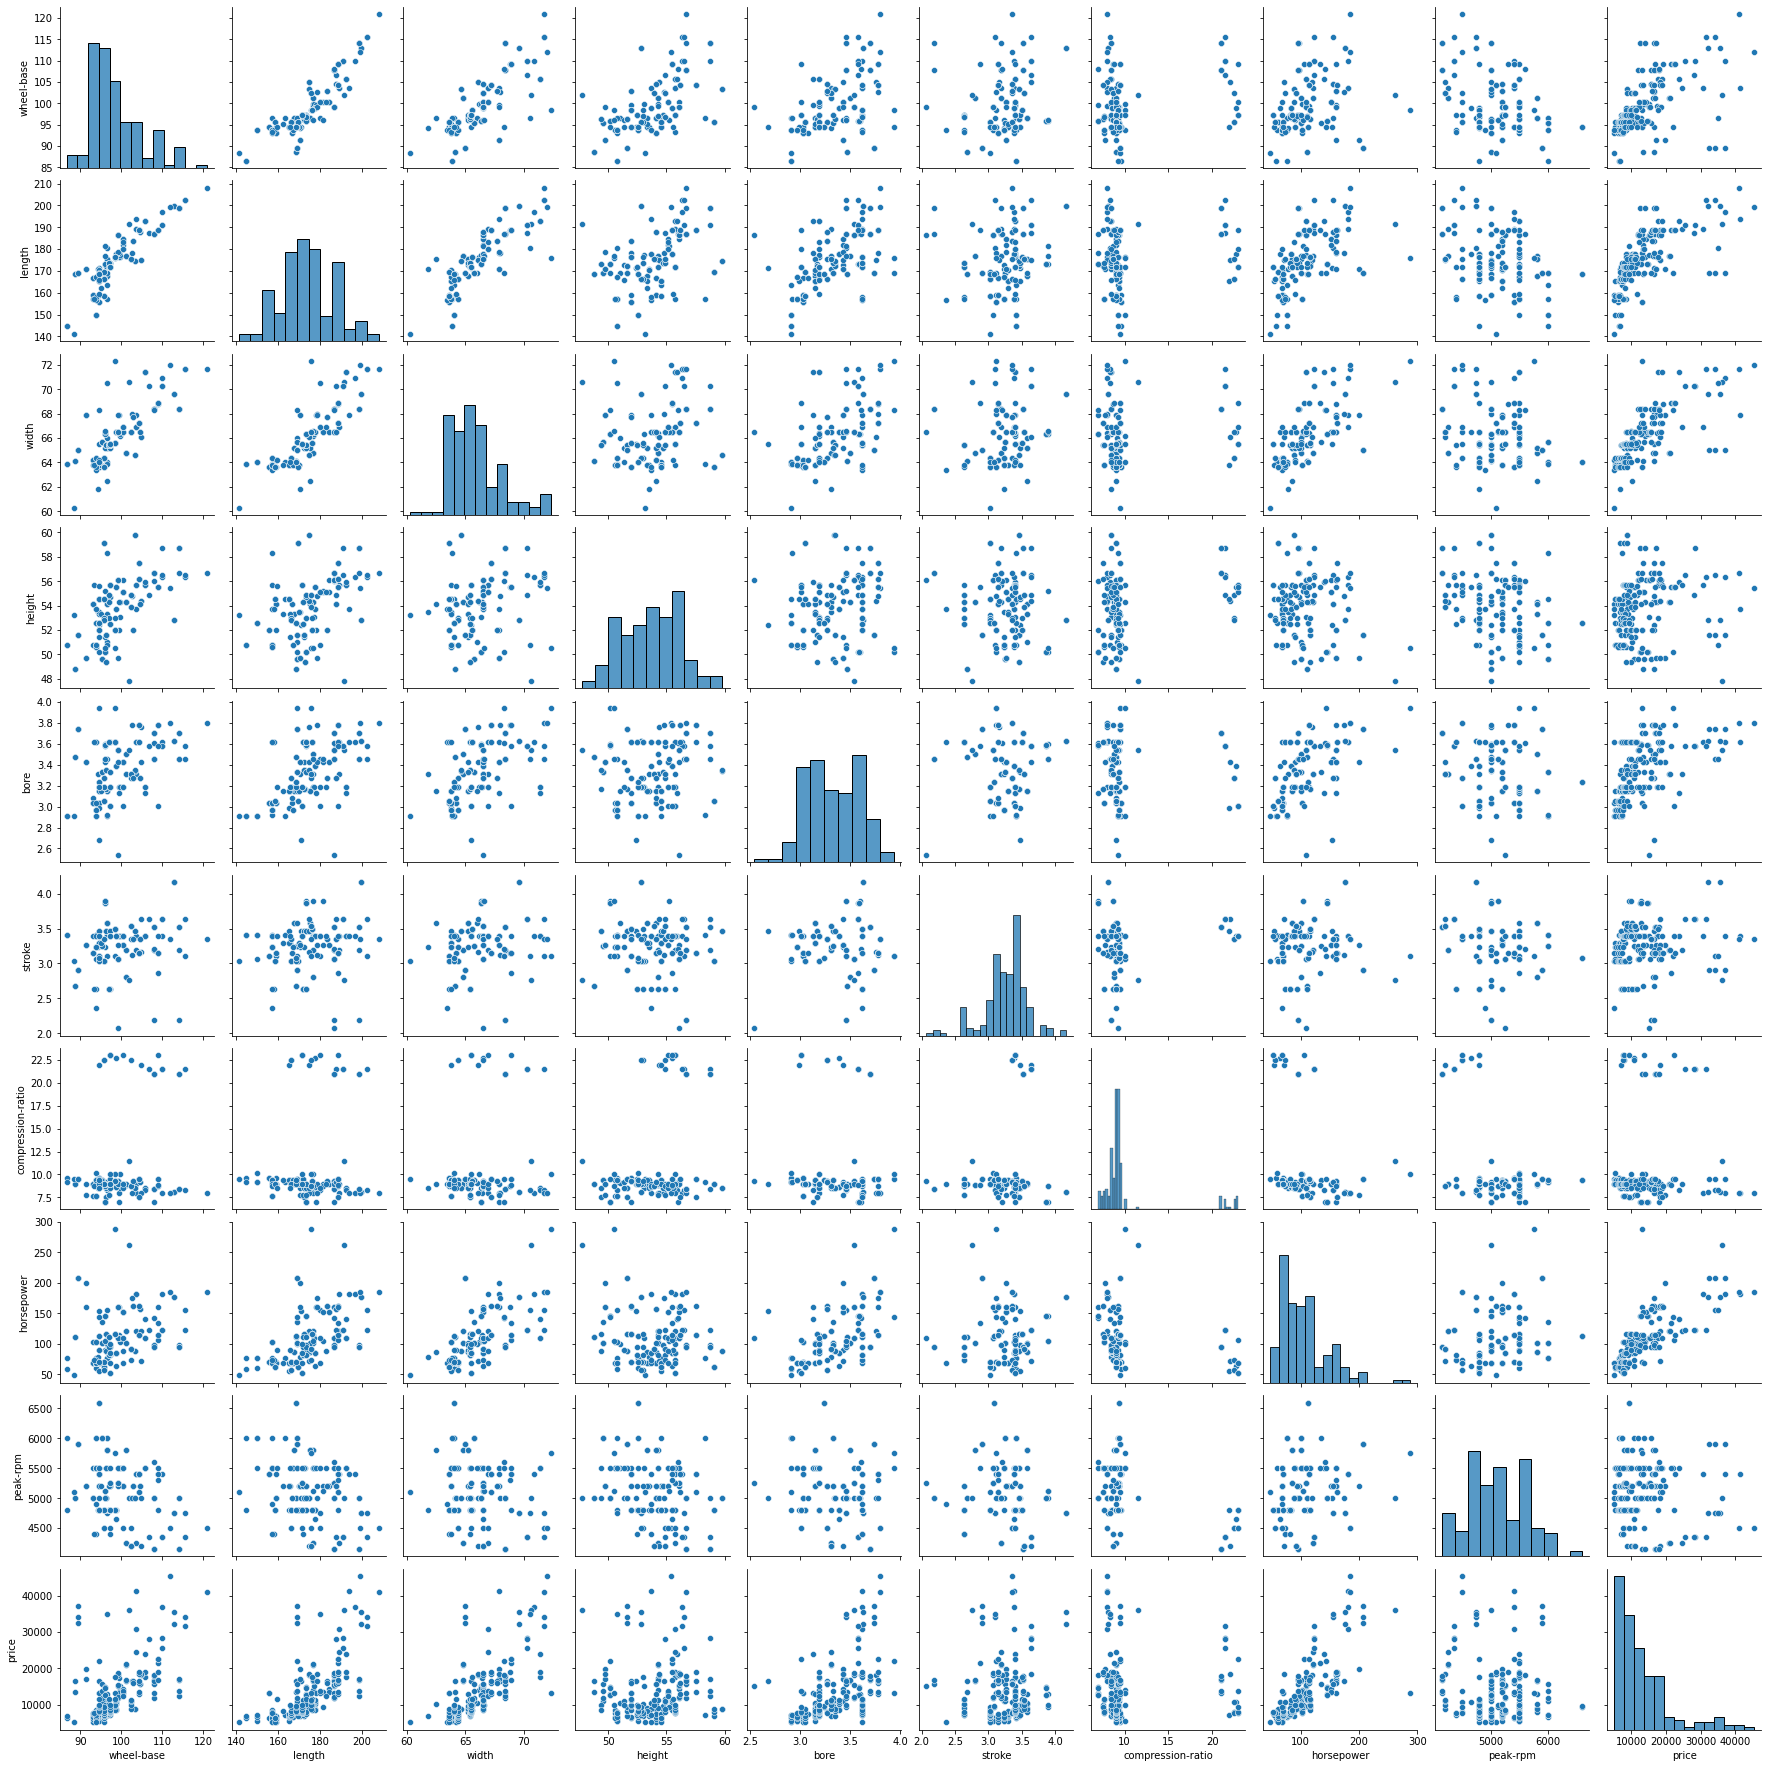

In [ ]:
# Contineous feature distribution
plt.figure(figsize=(20,6))
sns.pairplot(cars_data[contineous_feat])
plt.show()

In [ ]:
#Log transformation of Contineous Features
data = cars_data.copy()
for x in contineous_feat:
  data[x] = np.log(data[x])

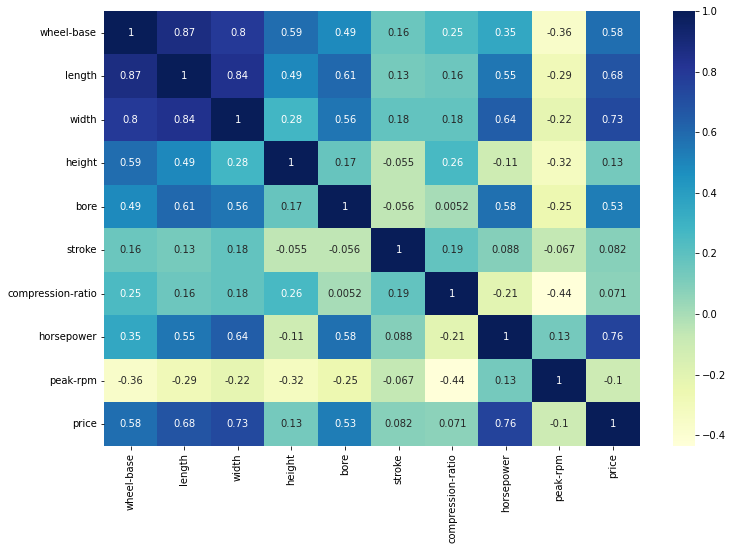

In [ ]:
# Correlation between Contineous Feature
plt.figure(figsize=(12,8))
sns.heatmap(cars_data[contineous_feat].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
cars_data[contineous_feat].corr().abs() * 100

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
wheel-base,100.000000,87.458748,79.514364,58.943476,48.876022,16.094387,24.978585,35.195733,36.070374,58.316815
length,87.458748,100.000000,84.111827,49.102946,60.646173,12.952179,15.841371,55.443414,28.703056,68.298630
width,79.514364,84.111827,100.000000,27.921032,55.915166,18.293913,18.112863,64.219544,21.985922,72.869882
height,58.943476,49.102946,27.921032,100.000000,17.110132,5.535131,26.121423,11.013703,32.060182,13.438752
bore,48.876022,60.646173,55.915166,17.110132,100.000000,5.590896,0.520071,57.573743,25.476130,53.230002
stroke,16.094387,12.952179,18.293913,5.535131,5.590896,100.000000,18.610517,8.826363,6.684439,8.209530
compression-ratio,24.978585,15.841371,18.112863,26.121423,0.520071,18.610517,100.000000,20.573968,43.593587,7.099036
horsepower,35.195733,55.443414,64.219544,11.013703,57.573743,8.826363,20.573968,100.000000,13.097080,75.791695
peak-rpm,36.070374,28.703056,21.985922,32.060182,25.476130,6.684439,43.593587,13.097080,100.000000,10.085407
price,58.316815,68.298630,72.869882,13.438752,53.230002,8.209530,7.099036,75.791695,10.085407,100.000000


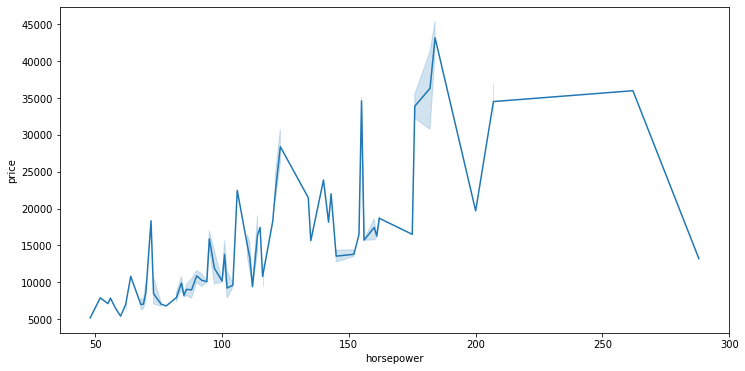

In [ ]:
# Analyze Relationship between Hrspower with Price

plt.figure(figsize=(12,6))
sns.lineplot(data=cars_data, x='horsepower', y='price')
plt.show()

<Figure size 864x432 with 0 Axes>

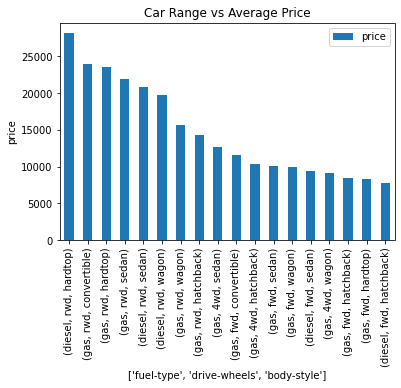

In [ ]:
# Analyze the Car Range vs Average Price

plt.figure(figsize=(12,6))
df = pd.DataFrame(cars_data.groupby(['fuel-type', 'drive-wheels','body-style'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.xlabel(['fuel-type', 'drive-wheels','body-style'])
plt.ylabel('price')
plt.show()

In [ ]:
cars_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
cars_data['engine-location'].unique()

array(['front', 'rear'], dtype=object)

<Figure size 864x432 with 0 Axes>

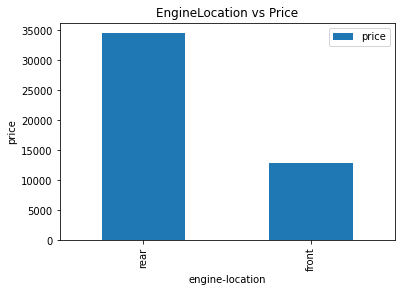

In [ ]:
# Analyze if the enginelocation with average price
plt.figure(figsize=(12,6))
dx = pd.DataFrame(cars_data.groupby(['engine-location'])['price'].mean().sort_values(ascending=False))
dx.plot.bar()
plt.xlabel('engine-location')
plt.ylabel('price')
plt.title('EngineLocation vs Price')
plt.show()

***So the Rear engine location cars average price is high***

<Figure size 864x432 with 0 Axes>

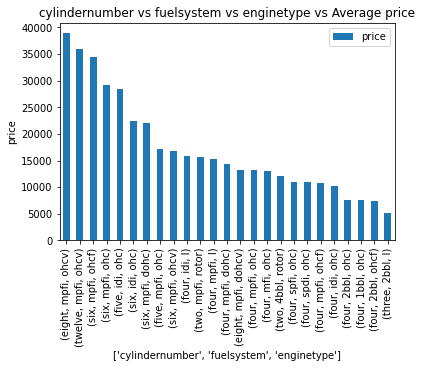

In [ ]:
# Analyze the cylindernumber vs fuelsystem vs enginetype vs Average price
plt.figure(figsize=(12,6))
df1 = pd.DataFrame(cars_data.groupby(['num-of-cylinders', 'fuel-system', 'engine-type'])['price'].mean().sort_values(ascending=False))
df1.plot.bar()
plt.title('cylindernumber vs fuelsystem vs enginetype vs Average price')
plt.xlabel(['cylindernumber', 'fuelsystem', 'enginetype'])
plt.ylabel('price')
plt.show()

In [ ]:
cars_data['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
# More selling Fuelsystem type
x = cars_data['fuel-system']
fuel_s = x.value_counts()
fuel_s

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

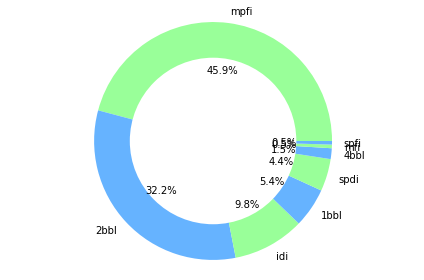

In [ ]:
fig1, ax1 = plt.subplots()
colors = ['#99ff99','#66b3ff']
ax1.pie(fuel_s, colors=colors, labels=fuel_s.index, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
# Get the price above $15,000 dollar with above 143HP car details

fivty_c = cars_data[(cars_data.price >= 15000) & (cars_data.horsepower >= 143)][['make', 'fuel-system', 'horsepower', 'price']].sort_values(by='price', ascending=False)
fivty_c

,make,fuel-system,horsepower,price
74,mercedes-benz,mpfi,184.0,45400.0
16,bmw,mpfi,182.0,41315.0
73,mercedes-benz,mpfi,184.0,40960.0
128,porsche,mpfi,207.0,37028.0
17,bmw,mpfi,182.0,36880.0
49,jaguar,mpfi,262.0,36000.0
48,jaguar,mpfi,176.0,35550.0
72,mercedes-benz,mpfi,155.0,35056.0
71,mercedes-benz,mpfi,155.0,34184.0
127,porsche,mpfi,207.0,34028.0


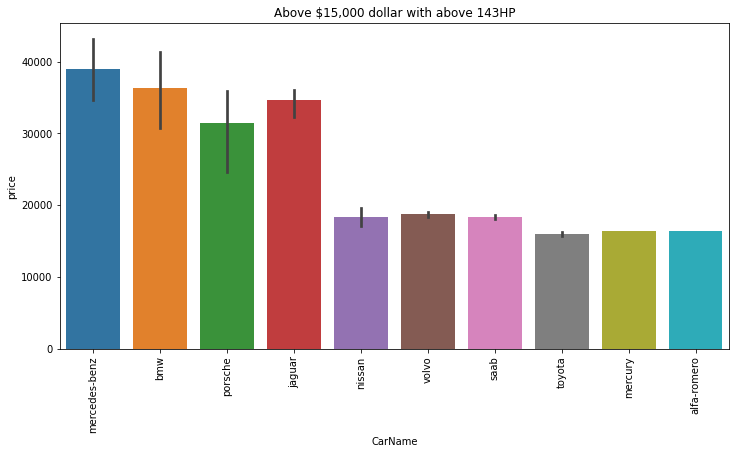

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=fivty_c[['make', 'price']], x='make', y='price')
plt.title('Above $15,000 dollar with above 143HP')
plt.xticks(rotation=90)
plt.xlabel('CarName')
plt.ylabel('price')
plt.show()

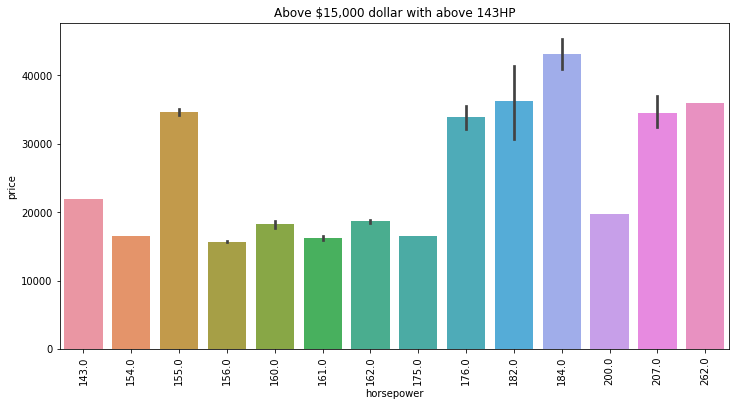

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=fivty_c[['horsepower', 'price']], x='horsepower', y='price')
plt.title('Above $15,000 dollar with above 143HP')
plt.xticks(rotation=90)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

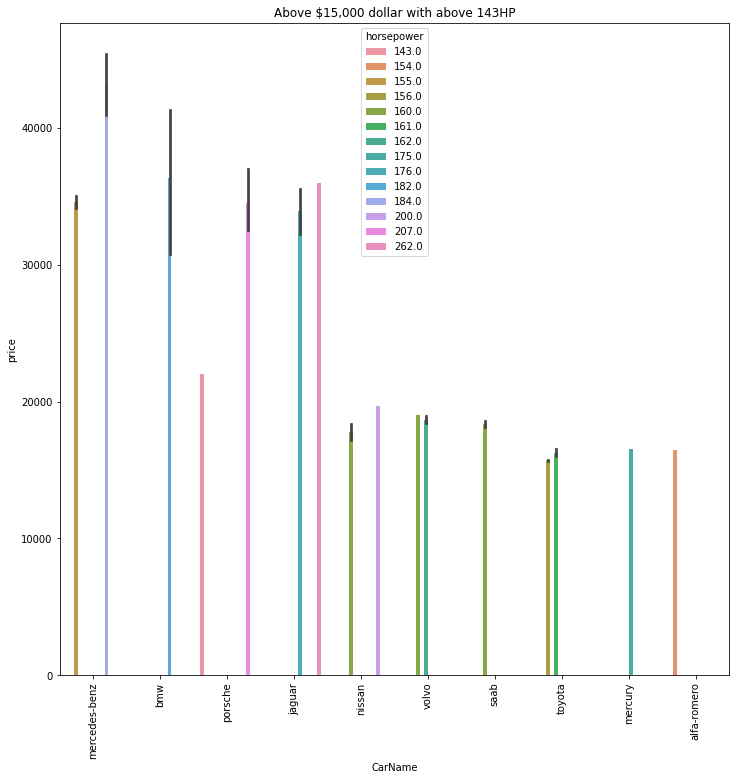

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(data=fivty_c, x='make', y='price', hue='horsepower')
plt.title('Above $15,000 dollar with above 143HP')
plt.xticks(rotation=90)
plt.xlabel('CarName')
plt.ylabel('price')
plt.show()

In [ ]:
cars_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# Capture if any missing values in the features

cars_data.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Handling the Rare Categorical Variables
categ_features = cars_data.columns[cars_data.dtypes == 'O']
categ_features

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [ ]:
for x in categ_features:
  temp=cars_data.groupby(x)['price'].count()/len(cars_data)
  tempdf = temp[temp>0.01].index
  cars_data[x] = np.where(cars_data[x].isin(tempdf), cars_data[x], 'Rar_var')

In [ ]:
cars_data[categ_features]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
for x in categ_features:
  print(x,':',len(cars_data[x].unique()), 'labels')

make : 21 labels
fuel-type : 2 labels
aspiration : 2 labels
num-of-doors : 3 labels
body-style : 5 labels
drive-wheels : 3 labels
engine-location : 2 labels
engine-type : 7 labels
num-of-cylinders : 6 labels
fuel-system : 7 labels


In [ ]:
# So No need to select top 10 categories

categ_df = pd.get_dummies(cars_data[categ_features])

In [ ]:
categ_df.shape

(205, 58)

In [ ]:
categ_df.head()

,make_Rar_var,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_Rar_var,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_Rar_var,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_Rar_var,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_Rar_var,fuel-system_idi,fuel-system_mpfi,fuel-system_spdi
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = cars_data.drop(categ_features, axis=1)


In [ ]:
df.shape

(205, 15)

In [ ]:
newdf = pd.concat([df, categ_df], axis=1)

In [ ]:

newdf.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_Rar_var,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_Rar_var,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_Rar_var,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_Rar_var,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_Rar_var,fuel-system_idi,fuel-system_mpfi,fuel-system_spdi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Feature Scaling

feaure_scale = [x for x in newdf.columns if x != 'price']
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(newdf[feaure_scale])

MinMaxScaler()

In [ ]:
data = pd.concat([newdf['price'].reset_index(drop=True),
                    pd.DataFrame(scalar.transform(newdf[feaure_scale]), columns=feaure_scale)],
                    axis=1)

In [ ]:
data.head()

,price,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_Rar_var,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_Rar_var,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_Rar_var,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_Rar_var,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_Rar_var,fuel-system_idi,fuel-system_mpfi,fuel-system_spdi
0,13495.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16500.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16500.0,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13950.0,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17450.0,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data.to_csv('car_price_assign_processed.csv',index=False)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('car_price_assign_processed.csv', delimiter=',')
df.head()

,price,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_Rar_var,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_Rar_var,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_Rar_var,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_Rar_var,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_Rar_var,fuel-system_idi,fuel-system_mpfi,fuel-system_spdi
0,13495.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16500.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16500.0,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13950.0,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17450.0,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Removing the highly correlated features using pearson correlation

# By avoiding overfitting split the dataset

x = df.drop(['price'], axis=1)
y = df.price

from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [ ]:
# Removing the highly correlated features using pearson correlation

# By avoiding overfitting split the dataset

x = cars_data.drop(['price'], axis=1)
y = cars_data.price

from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [ ]:
X_train.shape, x_test.shape

((143, 72), (62, 72))

In [ ]:
X_train.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_Rar_var,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_Rar_var,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_Rar_var,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_Rar_var,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_Rar_var,fuel-system_idi,fuel-system_mpfi,fuel-system_spdi
symboling,1.000000,-0.546537,-0.374573,-0.260420,-0.606380,-0.248560,-0.048167,-0.096941,0.048230,-0.190488,0.092781,0.223948,-0.047250,0.027708,0.064413,0.176938,0.023769,-0.044210,0.020511,0.031788,-0.072113,-0.057703,-0.078764,0.063803,-0.096810,0.208708,0.082835,-0.181341,0.023769,0.227703,0.159864,-0.049485,0.028677,0.083738,-0.467031,-0.199008,0.199008,0.079221,-0.079221,-0.031038,-0.672098,0.680598,0.261692,0.204820,0.467081,-0.391934,-0.337716,-0.098088,0.117613,-0.076108,-0.255151,0.255151,0.011758,0.170276,-0.148846,-0.165211,0.083299,0.057181,0.255151,0.016687,0.016687,-0.072113,-0.139756,0.102735,0.255151,-0.082493,0.018498,0.255151,0.146271,-0.199008,-0.047056,0.180432
wheel-base,-0.546537,1.000000,0.863088,0.782010,0.594178,0.759771,0.462462,0.466915,0.163633,0.304440,0.267753,-0.338527,-0.410417,-0.492190,0.014765,-0.205498,0.118586,0.090713,-0.157393,-0.129391,-0.117059,-0.107600,0.181616,-0.082385,0.275551,-0.161203,-0.198041,0.557098,-0.059655,-0.204155,0.008585,-0.127727,-0.025580,-0.017840,0.357436,0.357883,-0.357883,-0.324693,0.324693,-0.050122,0.437050,-0.426017,-0.217358,-0.007714,-0.372493,0.209813,0.315571,-0.081183,-0.453470,0.494779,0.232504,-0.232504,-0.004111,0.051541,0.486506,-0.154883,-0.229217,0.036767,-0.085657,-0.071750,0.134239,0.208625,-0.142249,0.055085,-0.085657,-0.112805,-0.431396,-0.085657,-0.040396,0.357883,0.339589,-0.137708
length,-0.374573,0.863088,1.000000,0.848613,0.440186,0.881106,0.633615,0.612347,0.155517,0.209712,0.512204,-0.260952,-0.647455,-0.692573,0.040151,-0.049662,0.166551,0.106671,-0.268314,-0.221925,-0.226857,-0.158163,0.221906,-0.076021,0.234173,-0.123895,-0.140423,0.416545,-0.114921,-0.043208,0.130777,-0.128264,-0.023396,0.024694,0.352095,0.260274,-0.260274,-0.315143,0.315143,-0.061047,0.354409,-0.340656,-0.042132,0.068432,-0.431759,0.186835,0.296383,-0.051757,-0.546117,0.575700,0.058326,-0.058326,0.014810,0.198390,0.326523,-0.251111,-0.142862,0.139166,-0.057088,-0.072627,0.139336,0.230758,-0.270797,0.195217,-0.057088,-0.230830,-0.541187,-0.057088,-0.002927,0.260274,0.516621,-0.094935
width,-0.260420,0.782010,0.848613,1.000000,0.241770,0.864415,0.694323,0.547376,0.199360,0.225704,0.623202,-0.171947,-0.634490,-0.667160,0.086477,-0.087033,0.283001,-0.018212,-0.233204,-0.167249,-0.129667,-0.197840,0.247600,-0.038358,0.358552,-0.078224,-0.175072,0.343508,-0.096077,0.084241,0.040442,-0.124166,-0.128655,0.009702,0.274616,0.267625,-0.267625,-0.360017,0.360017,-0.037243,0.172590,-0.164123,-0.089930,0.095893,-0.215824,0.107272,0.120836,-0.057633,-0.462129,0.493226,0.056384,-0.056384,0.263664,0.069263,0.259057,-0.258036,-0.138259,0.274324,-0.006875,-0.019979,0.365565,0.374567,-0.428953,0.167575,-0.006875,-0.142961,-0.562866,-0.006875,0.020387,0.267625,0.460032,-0.054069
height,-0.606380,0.594178,0.440186,0.241770,1.000000,0.269344,-0.031275,0.173699,-0.067745,0.286997,-0.189604,-0.329752,0.046626,-0.029003,-0.0

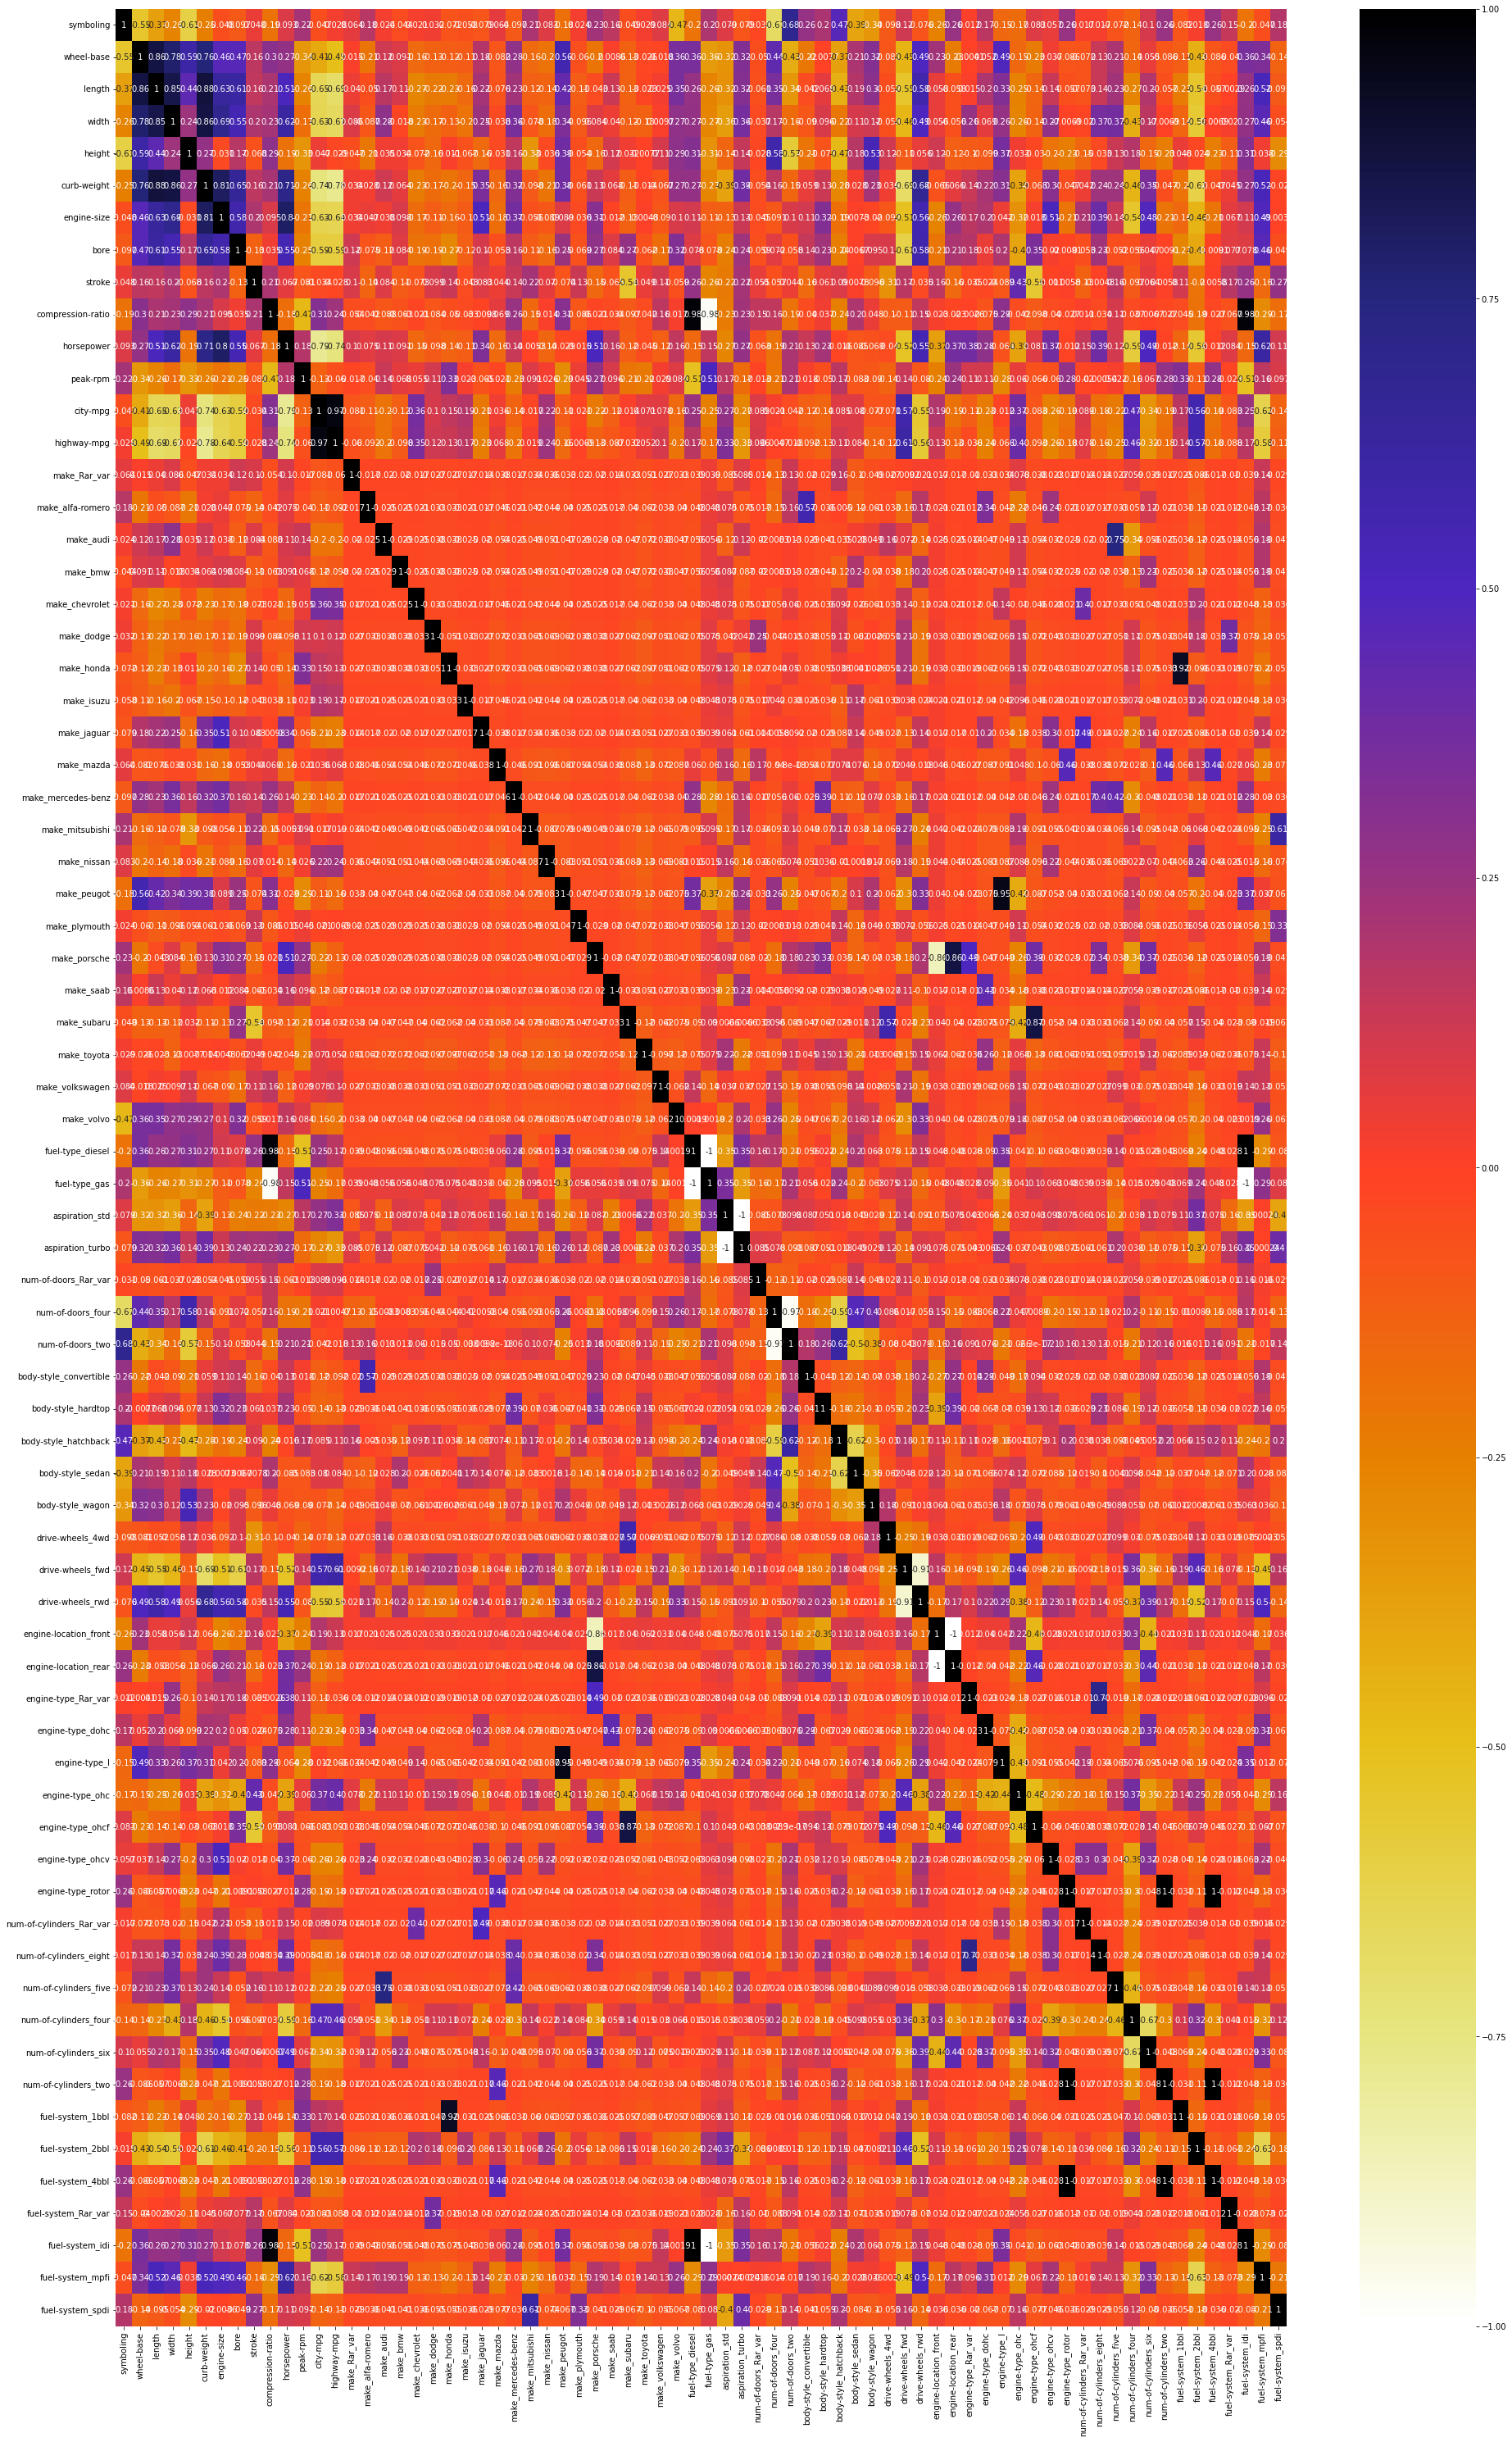

In [ ]:
plt.figure(figsize=(32,52))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# Following method check the each feature with other all feature and select highly correlated features 
# # it will remove the first feature that is correlated with anything other feature

def pearson_correlation(data=None, thresold=None):
  cor_col = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > thresold:
        cor_col.add(corr_matrix.columns[i])
  return cor_col

***In the above method the negative correlation also be taken to converted as a positive***

In [ ]:
corr_features = pearson_correlation(X_train, 0.85)
corr_features = list(corr_features)
corr_features

['fuel-type_diesel',
 'engine-location_front',
 'num-of-doors_two',
 'aspiration_turbo',
 'curb-weight',
 'engine-location_rear',
 'fuel-system_idi',
 'fuel-system_1bbl',
 'num-of-cylinders_two',
 'highway-mpg',
 'engine-type_l',
 'drive-wheels_rwd',
 'engine-type_ohcf',
 'length',
 'fuel-system_4bbl',
 'fuel-type_gas']

In [ ]:
X_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predict the test result
y_predict = linear.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
score

0.5195559797409354

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_predict)

2962.6995928059255

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_predict)

36619261.06299572

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_predict)

0.5195559797409354